# Naïve Bayes | Supervised Learning

# Dataset | Email Filtering 

### Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset

In [27]:
emails = pd.read_csv("emails.csv")
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [28]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [29]:
spam = emails[emails['spam']==1]

In [30]:
percentage_spam = (len(spam)/len(emails))*100
percentage_spam

23.88268156424581

In [31]:
ham = emails[emails['spam']==0]

In [32]:
percentage_ham = (len(ham)/len(emails))*100
percentage_ham

76.11731843575419

### Exploring Data

<AxesSubplot:xlabel='spam', ylabel='count'>

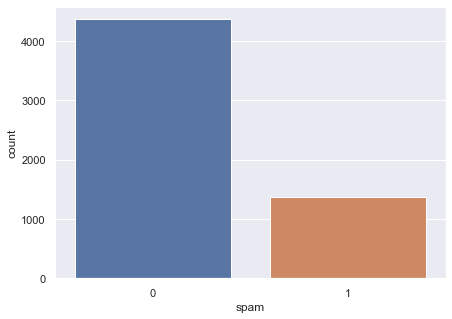

In [33]:
plt.figure(figsize=[7,5])
sns.countplot(x=emails['spam'])

### Vectorization & Splitting & Preprocessing  Data

In [34]:
#Vectorizing Data
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
cv = CountVectorizer()

In [36]:
emails_cv = cv.fit_transform(emails['text'])

In [37]:
emails_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
X = emails_cv.toarray()

In [39]:
y = emails['spam']

In [40]:
# Splitting Data
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

### Model Training & Predicting 

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
clf = MultinomialNB()

In [44]:
clf.fit(X_train, y_train)

MultinomialNB()

### Model Evaluation  

In [45]:
y_predict = clf.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [46]:
y_test.values

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [48]:
cf_matrix= confusion_matrix(y_test, y_predict)
cf_matrix

array([[1382,   16],
       [   6,  487]], dtype=int64)

In [49]:
# Accuracy Score
accuracy_score(y_test, y_predict).round(2)

0.99

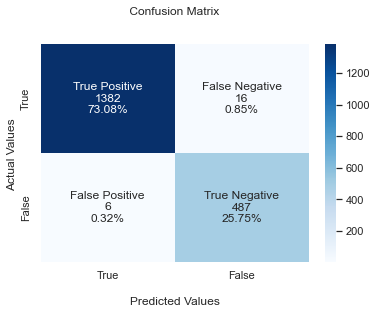

In [50]:

group_names = ['True Positive','False Negative','False Positive','True Negative']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title(' Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()

# THANKS